In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

In [3]:
from extract_pdf_data import extract_pdf_data

def read_pdfs():
    results = []
    for page_number in range(83, 375, 2):
        print(f"Processing page {page_number}...")
        data = extract_pdf_data(page_number, 'tertiary education')
        results.append(data)
    
    df = pd.DataFrame(results)
    return df



In [4]:

import os
if not os.path.exists("wef_tertiary_enrolment.csv"):
    df = read_pdfs()
    df.to_csv("wef_tertiary_enrolment.csv", index=False)

In [5]:
df = pd.read_csv("wef_tertiary_enrolment.csv")
df.shape

(146, 7)

In [33]:
for country in df['country'].unique():
    if len(country) > 15:
        print(country)

Bosnia and Herzegovina
Brunei Darussalam
Congo, Democratic Republic of t
Dominican Republic
Moldova, Republic of
United Arab Emirates
United Republic of Tanzania
United States of America


In [37]:
df['country'] = df['country'].replace({
    'United States of America': 'United States',
    'Brunei Darussalam': 'Brunei',
    'Moldova, Republic of': 'Moldova',
    'Congo, Democratic Republic of t': 'D.R. Congo',
    'United Republic of Tanzania': 'Tanzania',
    'Viet Nam': 'Vietnam',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    
})

In [38]:
df.head()

,country,page_number,score,rank,diff,left,right,ratio,revised_score
0,Albania,83,1.000,1.0,24.48,50.60,75.08,0.673948,0.673948
1,Algeria,85,1.000,1.0,28.61,39.40,68.01,0.579327,0.579327
2,Angola,87,0.899,112.0,-1.17,10.48,11.65,0.899571,0.899571
3,Argentina,89,1.000,1.0,64.82,75.48,140.30,0.537990,0.537990
4,Armenia,91,1.000,1.0,16.72,51.61,68.34,0.755195,0.755195


In [39]:
df.tail()

,country,page_number,score,rank,diff,left,right,ratio,revised_score
141,Uzbekistan,365,0.940,110.0,-2.54,39.87,42.41,0.940108,0.940108
142,Vanuatu,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,Vietnam,369,1.000,1.0,2.65,40.93,43.58,0.939192,0.939192
144,Zambia,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Zimbabwe,373,0.962,108.0,-0.38,9.54,9.92,0.961694,0.961694


The study includes 146 countries. We have tertiary education data for 135 of them (missing 11).

In 104/135 countries, women participate in tertiary education at rates equal or higher than men, so there is a 104-way tie for Rank #1.

So in 104 countries, the problem of gender equality in higher education is entirely solved, and there is no reason to allocate any further attention or resources to the problem. Yay!

In [40]:
df['rank'].value_counts(dropna=False)

rank
1.0      104
NaN       11
112.0      1
117.0      1
131.0      1
127.0      1
124.0      1
113.0      1
114.0      1
135.0      1
120.0      1
129.0      1
119.0      1
128.0      1
109.0      1
134.0      1
105.0      1
107.0      1
121.0      1
132.0      1
116.0      1
133.0      1
126.0      1
111.0      1
123.0      1
106.0      1
115.0      1
125.0      1
130.0      1
122.0      1
118.0      1
110.0      1
108.0      1
Name: count, dtype: int64

Only 31 countries received less than a perfect score in this category.

In [41]:
dinged = df['score'] < 1
dinged.sum()

np.int64(31)

Here is the distribution of their scores.

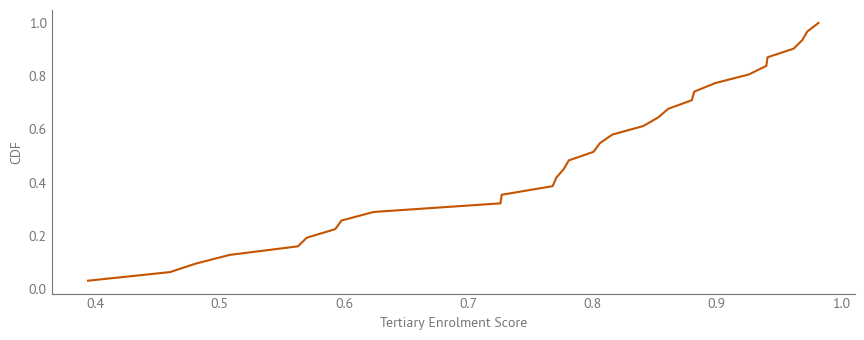

In [42]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='Tertiary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

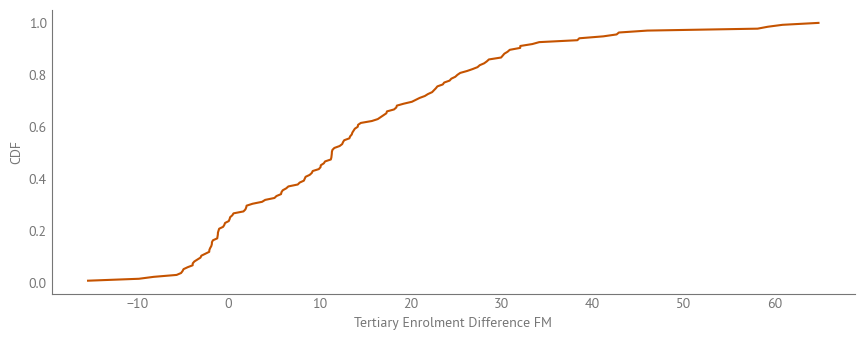

In [43]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='Tertiary Enrolment Difference FM', ylabel='CDF')


In countries where women are lagging, they lag by fewer than 10 percentage points in most cases. In countries where men are lagging, the differences are much bigger, sometimes 40-60 percentage points.
So the WEF metrics are hiding the biggest differences.

Here are the countries where women lag men.

In [44]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right,ratio,revised_score
145,Zimbabwe,373,0.962,108.0,-0.38,9.54,9.92,0.961694,0.961694
114,Senegal,311,0.973,106.0,-0.46,16.57,17.04,0.972418,0.972418
61,India,205,0.982,105.0,-0.59,32.81,33.40,0.982335,0.982335
103,Pakistan,289,0.926,111.0,-1.03,12.90,13.93,0.926059,0.926059
138,Tanzania,359,0.816,118.0,-1.10,4.88,5.98,0.816054,0.816054
92,Mozambique,267,0.853,116.0,-1.16,6.72,7.88,0.852792,0.852792
2,Angola,87,0.899,112.0,-1.17,10.48,11.65,0.899571,0.899571
134,Uganda,351,0.777,122.0,-1.20,4.16,5.36,0.776119,0.776119
53,Ghana,189,0.941,109.0,-1.24,19.77,21.00,0.941429,0.941429
23,Burundi,129,0.768,124.0,-1.71,5.66,7.37,0.767978,0.767978


The data for South Korea are weird. Male enrollment is 111% and for women it's "only" 95%.
Maybe the denominator is college-age people and "college age" is shifted because of mandatory military service?

The scores are based on ratios, not differences, so let's compute those.

In [45]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    135.000000
mean       0.741685
std        0.147372
min        0.212956
25%        0.658574
50%        0.746673
75%        0.850590
max        0.999506
Name: ratio, dtype: float64

Looks like the ratio IS the score.

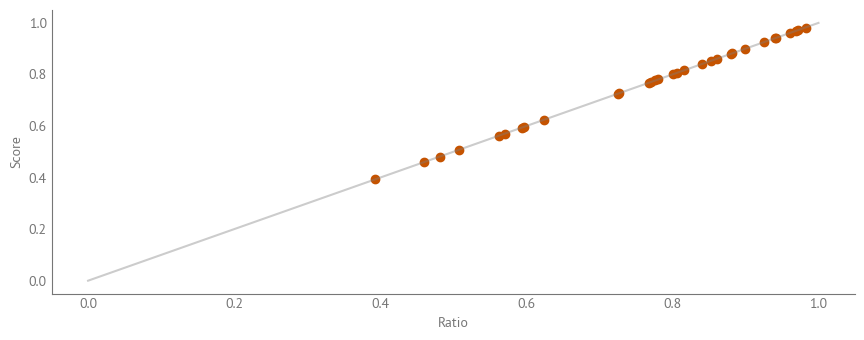

In [46]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')


In [47]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    subset['ratio'], subset['score'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: 0.9998860394149466
Intercept: 0.00016965563677673323
R-value: 0.9999968288921758
P-value: 6.302077788732111e-77
Standard Error: 0.00046759842654030753


So here are the revised, symmetric scores.

In [48]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    135.000000
mean       0.741685
std        0.147372
min        0.212956
25%        0.658574
50%        0.746673
75%        0.850590
max        0.999506
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

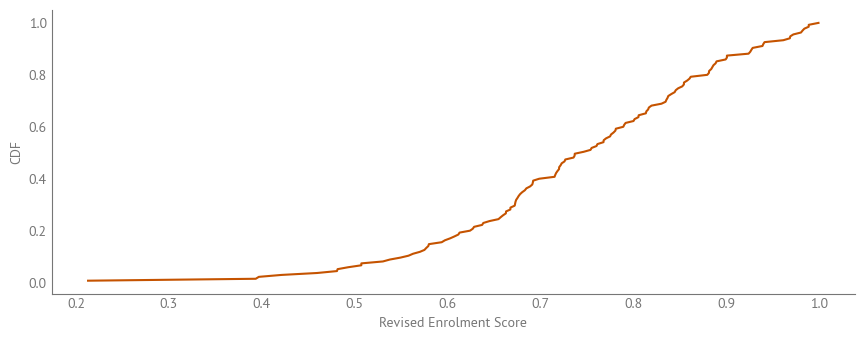

In [49]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

In [50]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(104, 9)

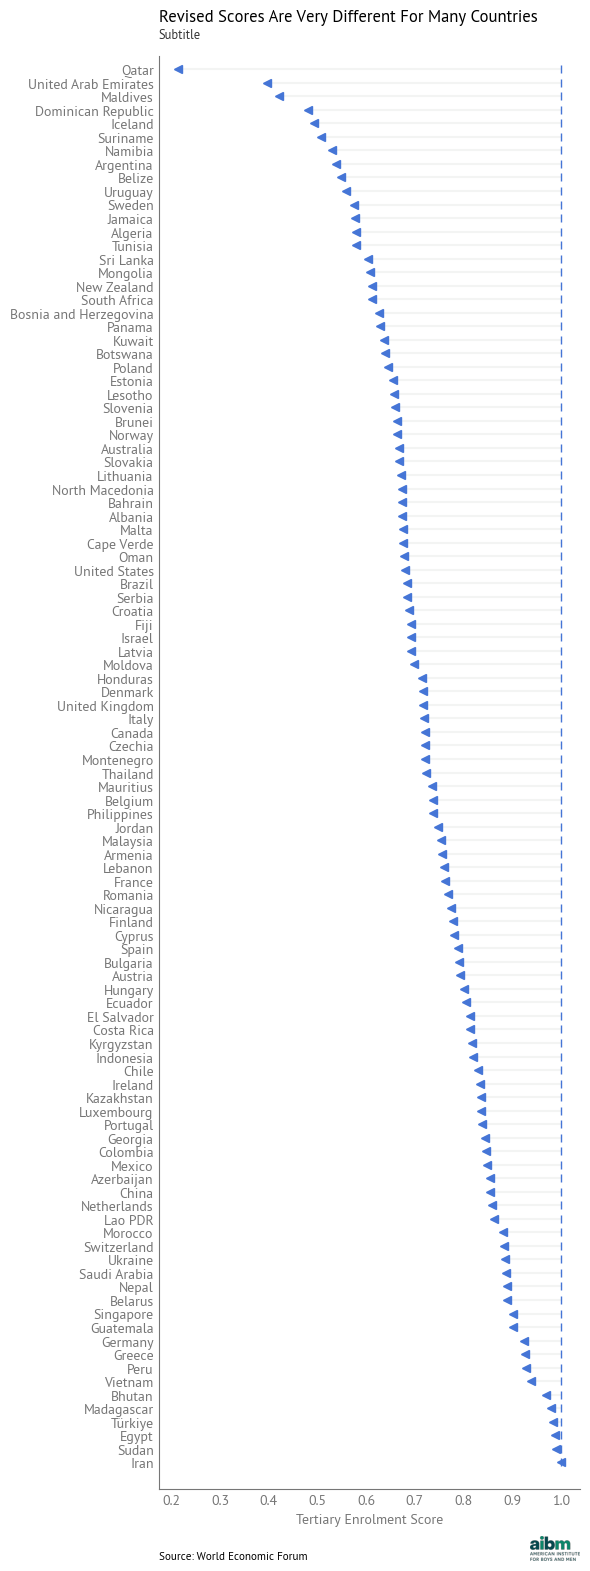

In [51]:
# make a figure that shows a horizontal line for each country that
# connects the revised score and the tertiary enrolment score
# with a circle for the original and a triangle for the revised

from utils import add_title, add_subtext, add_logo

fig, ax = plt.subplots(figsize=(6, 15))
plt.hlines(revised['country'], 
           revised['score'], revised['revised_score'], 
           color=AIBM_COLORS['light_gray'])
plt.plot(revised['score'], revised['country'], '|', 
         color=AIBM_COLORS['blue'])
plt.plot(revised['revised_score'], revised['country'], '<', 
         color=AIBM_COLORS['blue'])
ax.invert_yaxis()

decorate(xlabel='Tertiary Enrolment Score', ylim=[len(revised)+1, -1])
add_title("Revised Scores Are Very Different For Many Countries",
          "Subtitle", y=1.01)
add_subtext("Source: World Economic Forum", y=-0.05)
logo = add_logo(location=(1.0, -0.05))



And here's the new ranking of countries based on revised scores.

In [24]:
columns = ['revised_rank', 'country', 'score', 'revised_score', 'diff']
df_sorted = df.dropna(subset=['ratio']).sort_values(by='revised_score', ascending=False)
df_sorted['revised_rank'] = np.arange(1, len(df_sorted)+1)
table = df_sorted[columns].round(2)
table.to_csv("wef_tertiary_enrolment_table.csv", index=False)

In [25]:


df_sorted[columns].head(40).round(2)

,revised_rank,country,score,revised_score,diff
63,1,Iran,1.00,1.00,0.03
124,2,Sudan,1.00,0.99,0.18
42,3,Egypt,1.00,0.99,0.42
133,4,Türkiye,1.00,0.98,1.99
61,5,India,0.98,0.98,-0.59
81,6,Madagascar,1.00,0.98,0.12
114,7,Senegal,0.97,0.97,-0.46
15,8,Bhutan,1.00,0.97,0.55
68,9,Japan,0.97,0.97,-2.01
145,10,Zimbabwe,0.96,0.96,-0.38


In [26]:
df_sorted[columns].tail(50).round(2)

,revised_rank,country,score,revised_score,diff
36,86,Croatia,1.00,0.69,26.82
115,87,Serbia,1.00,0.68,24.92
19,88,Brazil,1.00,0.68,22.78
139,89,United States of America,1.00,0.68,30.31
102,90,Oman,1.00,0.68,17.03
27,91,Cape Verde,1.00,0.68,7.82
85,92,Malta,1.00,0.68,30.66
0,93,Albania,1.00,0.67,24.48
8,94,Bahrain,1.00,0.67,30.31
100,95,North Macedonia,1.00,0.67,16.40


In [28]:
df.query("country == 'Qatar'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score
110,Qatar,303,1.0,1.0,60.87,16.47,77.34,0.212956,0.212956


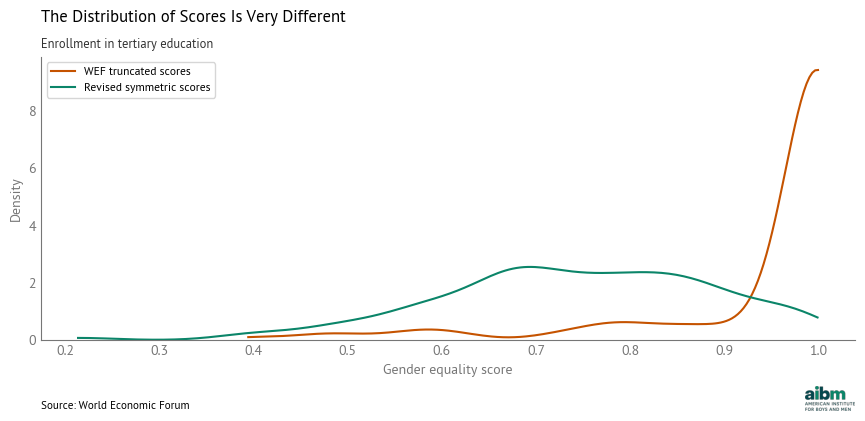

In [60]:
import seaborn as sns

options = dict(cut=0, bw_adjust=0.7)

sns.kdeplot(df['score'], label='WEF truncated scores', **options)
sns.kdeplot(df['revised_score'], label='Revised symmetric scores', **options)

decorate(xlabel='Gender equality score')

add_title("The Distribution of Scores Is Very Different",
          "Enrollment in tertiary education")
add_subtext("Source: World Economic Forum", y=-0.25)
logo = add_logo(location=(1.0, -0.25))
None